<a href="https://colab.research.google.com/github/jhchang/Sentiment-Analysis-on-Arabic-Text/blob/main/arabic-dialect-code-switch-profiler/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧹 Data Exploration and Preprocessing

# 📚 Table of Contents
- Intro
- Dataset Description
- What is code-switching and how to detect it?
- Exploratory Data Analysis on the Dataset
- Conclusion

---

This notebook marks the start of our Arabic dialect and code-switch detection project. The primary focus is to gain a deep understanding of the dataset and to prepare the text for modeling.

Since Arabic dialects exhibit rich variation in vocabulary, spelling, and syntax, effective preprocessing is essential to downstream model performance.

### ✅ Objectives:
- Load and inspect the dataset structure and label distribution.
- Perform initial cleaning of Arabic text:
  - Normalize Arabic script (e.g., unifying characters like "أ", "إ", and "ا")
  - Remove punctuation, diacritics, and non-Arabic characters
  - Strip URLs, mentions, emojis, and other noise common in social media
- Tokenize the text and optionally explore frequency distributions.
- Prepare clean text and label arrays for model input.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Note**: Downloading the dataset to the google drive. Uncomment if you have to do this for the first time running the code.

In [ ]:
# !wget -P /content/drive/MyDrive/datasets https://camel.abudhabi.nyu.edu/madar-shared-task-2019/MADAR-SHARED-TASK-final-release-25Jul2019.zip

In [ ]:
import zipfile
from tqdm import tqdm
import os

zip_path = "/content/drive/MyDrive/datasets/MADAR-SHARED-TASK-final-release-25Jul2019.zip"
extract_to = "/content/MADAR/"

# Count the total number of files in the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    total_files = len(zip_ref.infolist())

    print(f"📦 Unzipping {total_files} files to {extract_to}...")

    with tqdm(total=total_files, unit="files") as pbar:
        for file in zip_ref.infolist():
            zip_ref.extract(member=file, path=extract_to)
            pbar.update(1)

print("✅ Unzip complete!")

📦 Unzipping 54 files to /content/MADAR/...


100%|██████████| 54/54 [00:00<00:00, 118.45files/s]

✅ Unzip complete!


In [ ]:
# zip_path = "/content/drive/MyDrive/datasets/Arabic-English-Intra-Word-Code-Switching-Corpus.zip"
# extract_to = "/content/AR-EN/"


In [ ]:
# # Count the total number of files in the zip
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     total_files = len(zip_ref.infolist())

#     print(f"📦 Unzipping {total_files} files to {extract_to}...")

#     with tqdm(total=total_files, unit="files") as pbar:
#         for file in zip_ref.infolist():
#             zip_ref.extract(member=file, path=extract_to)
#             pbar.update(1)

# print("✅ Unzip complete!")

#Descriptions of the Dataset:

##MADAR:
The provided train, development and test files correspond to
Corpus-26 and Corpus-6 in Salameh et al. (2018).

* Corpus-26 train set (MADAR-Corpus26-train.tsv) consists of
1,600 sentences in 26 versions (MSA and 25 city dialects) =
1,600*(1 + 25) = 41,600 sentences, with their corresponding labels.

* Corpus-26 dev set (MADAR-Corpus26-dev.tsv) consists of 200
sentences in 26 versions  (MSA and 25 city dialects) =
200*(1 + 25) =  5,200 sentences, with their corresponding labels.

* Corpus-26 test set (MADAR-Corpus26-test.tsv) consists of 200
sentences in 26 versions  (MSA and 25 city dialects) =
200*(1 + 25) =  5,200 sentences, with their corresponding labels.

* Corpus-6 train set (MADAR-Corpus6-train.tsv) consists of 9,000
sentences in 6 versions (MSA and 5 city dialects) = 9,000*(1 + 5)
=  54,000 sentences, with their corresponding labels.

* Corpus-6 dev set (MADAR-Corpus6-dev.tsv) consists of 1,000
sentences in 6 versions (MSA and 5 city dialects) =
1,000*(1 + 5) =  6,000 sentences, with their corresponding labels.

The labels of dialects for the cities and MSA are defined in
Salameh et al. (2018): ALE, ALG, ALX, AMM, ASW, BAG, BAS, BEI,
BEN, CAI, DAM, DOH, FES, JED, JER, KHA, MOS, MUS, RAB, RIY, SAL,
SAN, SFX, TRI, TUN and MSA.

Here is a table for the mapping city Acronyms to the entire city names.


| **Country** | **City**   | **Code** |      | **Country**  | **City**  | **Code** |
| ----------- | ---------- | -------- | ---- | ------------ | --------- | -------- |
| Algeria     | Algiers    | ALG      |      | Palestine    | Jerusalem | JER      |
| Morocco     | Rabat      | RAB      |      | Syria        | Beirut    | BEI      |
|             | Fes        | FES      |      |              | Damascus  | DAM      |
| Tunisia     | Tunis      | TUN      |      |              | Aleppo    | ALE      |
|             | Sfax       | SFX      |      |              | Mosul     | MOS      |
| Libya       | Tripoli    | TRI      |      | Iraq         | Baghdad   | BAG      |
|             | Benghazi   | BEN      |      |              | Basra     | BAS      |
| Egypt       | Cairo      | CAI      |      | Saudi Arabia | Riyadh    | RIY      |
|             | Alexandria | ALX      |      |              | Jeddah    | JED      |
|             | Aswan      | ASW      |      | Oman         | Muscat    | MUS      |
| Sudan       | Khartoum   | KHA      |      | Qatar        | Doha      | DOHA     |
| Jordan      | Amman      | AMM      |      | Yemen        | Sanaa     | SAN      |
|             | Salt       | SAL      |      |              |           |          |




#🧠 What is **Code-Switch Detection**?

Code-switching refers to the practice of mixing two or more languages within the same sentence, tweet, or conversation. In this project, it specifically means identifying where Arabic and English are mixed in real-world text, especially social media.

---

##✅ Why It Matters (Especially for Saudi NLP)

- Saudi tweets, WhatsApp chats, and Instagram captions often mix Arabic and English casually.
- Government and Vision 2030 platforms are targeting digital fluency, so models that understand multilingual behavior are valuable.
- Detecting code-switching helps improve:

    - Chatbots

    - Voice assistants

    - Social media analysis

    - Hate speech or sentiment classifiers that fail on mixed-language text

---

## ⚠️ Problem: Arabizi + English Code-Switching

**English and Arabizi both use Latin characters**, so it's **easy to confuse them**, especially in preprocessing:

### 📍 Example 1: Mixed Arabizi + English

> `"ana 3ayez go to the gym"`

* `"ana 3ayez"` → Arabizi → Arabic dialect (Egyptian)
* `"go to the gym"` → English → not Arabizi

**Mistake to avoid**: Translating `"go"` or `"gym"` through an Arabizi map like `"g → ج"` (nonsense result)

---

## ✅ Strategy: Distinguish Arabizi vs English **Before Transliteration**

You can break this into 2 stages:

### 🔹 1. **Tokenization**

Split the sentence into **words**.

```python
text = "ana 3ayez go to the gym"
tokens = text.split()
```

### 🔹 2. **Word-Level Detection**

For each token:

* If it contains **numbers** (e.g., `3`, `7`) → likely Arabizi → transliterate
* If it’s **pure Latin letters**, check if it’s an **English word** (via spellchecker or English vocab)

```python
from spellchecker import SpellChecker

en_spell = SpellChecker(language='en')

def is_arabizi(word):
    return any(char.isdigit() for char in word)

def is_english_word(word):
    return word.lower() in en_spell

def process_token(token):
    if is_arabizi(token):
        return transliterate_arabizi(token)  # Your mapping here
    elif is_english_word(token):
        return token  # leave as-is
    else:
        return token  # unknown: maybe proper noun or typo
```

---

Technically any multilingual ML model can ingest Arabizi directly, especially models like mBERT, XLM-R, or AraBERT that were trained on diverse corpora. But there's nuance. Let's unpack what really happens under the hood and what you gain or lose by explicitly mapping Arabizi to Arabic.

| Approach                         | Can ML handle Arabizi as-is?       | Should you map it?              | Why?                                           |
| -------------------------------- | ---------------------------------- | ------------------------------- | ---------------------------------------------- |
| Raw Arabizi → Model              | ✅ Yes, but performance may degrade | ❌ Not ideal for dialect NLP     | No shared tokens with Arabic                   |
| Arabizi → Arabic mapping → Model | ✅ Yes, more effective              | ✅ Often improves classification | Boosts alignment with pretrained Arabic tokens |

So in order to take advatage of pretrained model learnings. We can map Arabizi to Arabic.

 ## ❗❗❗ **NOTE**:
To ensure the model is adaptable to real-world applications like Saudi social media monitoring, I included pseudocode for a preprocessing module that can handle Arabizi (transliterated Arabic) and English-Arabic code-switching. While the current datasets (MADAR/CALD) are clean, this module enables future robustness testing on noisy user-generated content.

---
# Exploring and analyzing the dataset

In [ ]:
import pandas as pd

# Replace with your file path
file_path = "/content/MADAR/MADAR-SHARED-TASK-final-release-25Jul2019/MADAR-Shared-Task-Subtask-1/MADAR-Corpus-26-train.tsv"

# Read TSV file into a DataFrame
train_df = pd.read_csv(file_path, sep='\t', header=None, names=['text', 'dialect'])

# Preview
train_df.head()


,text,dialect
0,هناك ، أمام بيانات السائح تماما .,MSA
1,لم اسمع بهذا العنوان من قبل بالقرب من هنا .,MSA
2,استمر في السير في هذا الطريق حتى تجد صيدلية .,MSA
3,كم تكلفة الإفطار ؟,MSA
4,كيف أستطيع مساعدتك ؟,MSA


In [ ]:
# Replace with your file path
file_path = "/content/MADAR/MADAR-SHARED-TASK-final-release-25Jul2019/MADAR-Shared-Task-Subtask-1/MADAR-Corpus-26-dev.tsv"

# Read TSV file into a DataFrame
val_df = pd.read_csv(file_path, sep='\t', header=None, names=['text', 'dialect'])

# Preview
val_df.head()


,text,dialect
0,بالمناسبة ، اسمي هيروش إيجيما .,MSA
1,"هذا القطار يتوقف في لاك فورست , أليس كذلك ؟",MSA
2,"هذا الكارت , حسناً ؟",MSA
3,لم يخرج من الماكينة شيء .,MSA
4,عندك أية شيء يمكن أن أتعاطه للطفح الجلدي ؟,MSA


In [ ]:
# Replace with your file path
file_path = "/content/MADAR/MADAR-SHARED-TASK-final-release-25Jul2019/MADAR-Shared-Task-Subtask-1/MADAR-Corpus-26-test.tsv"

# Read TSV file into a DataFrame
test_df = pd.read_csv(file_path, sep='\t', header=None, names=['text', 'dialect'])

# Preview
test_df.head()


,text,dialect
0,لا أعرف كثيراً عن النبيذ ؟ ماذا يناسب هذا الطبق ؟,MSA
1,رايح عالمدرسة هون ؟,DAM
2,قهوه مع كريمة و سكر ، لوسمحت .,SAN
3,بأي محطة لازم أنزل عشان أروح على امباير ستيت ب...,AMM
4,اسمي ميتشيكو تاناكا ، ورقم الرحلة خمسة صفر واح...,JED


In [ ]:
# Basic info
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41600 entries, 0 to 41599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     41600 non-null  object
 1   dialect  41600 non-null  object
dtypes: object(2)
memory usage: 650.1+ KB
None


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,text,dialect
10157,أنا حاسس كأن فى حد بيبحلقلى . هو للدرجة دى ناد...,ALX
29533,ما احس مرتاح ، ممكن ارجع مقعدي ؟,BAS
28961,هاي محطة اكسبريس ؟,BAS
16071,خمسطعش أيلول هوة يوم احترام الكبار بالسن .,DAM
13120,هي بدها تشتري فستان .,AMM


In [ ]:
val_df.head()

,text,dialect
0,بالمناسبة ، اسمي هيروش إيجيما .,MSA
1,"هذا القطار يتوقف في لاك فورست , أليس كذلك ؟",MSA
2,"هذا الكارت , حسناً ؟",MSA
3,لم يخرج من الماكينة شيء .,MSA
4,عندك أية شيء يمكن أن أتعاطه للطفح الجلدي ؟,MSA


In [ ]:
test_df.head()

,text,dialect
0,لا أعرف كثيراً عن النبيذ ؟ ماذا يناسب هذا الطبق ؟,MSA
1,رايح عالمدرسة هون ؟,DAM
2,قهوه مع كريمة و سكر ، لوسمحت .,SAN
3,بأي محطة لازم أنزل عشان أروح على امباير ستيت ب...,AMM
4,اسمي ميتشيكو تاناكا ، ورقم الرحلة خمسة صفر واح...,JED


In [ ]:
train_df.dialect.value_counts()

,count
dialect,
MSA,1600
BEI,1600
CAI,1600
DOH,1600
RAB,1600
TUN,1600
ALX,1600
ALG,1600
AMM,1600


In [ ]:
print(f"Total training samples: {len(train_df)}")
print(f"Total training samples: {len(val_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df) + len(val_df)} ")

Total training samples: 41600
Total training samples: 5200
Total test samples: 5200
Total samples: 52000 


        text_length    word_count
count  41600.000000  41600.000000
mean      31.288438      7.084567
std       17.863424      3.720397
min        4.000000      2.000000
25%       20.000000      5.000000
50%       28.000000      6.000000
75%       38.000000      8.000000
max      193.000000     46.000000


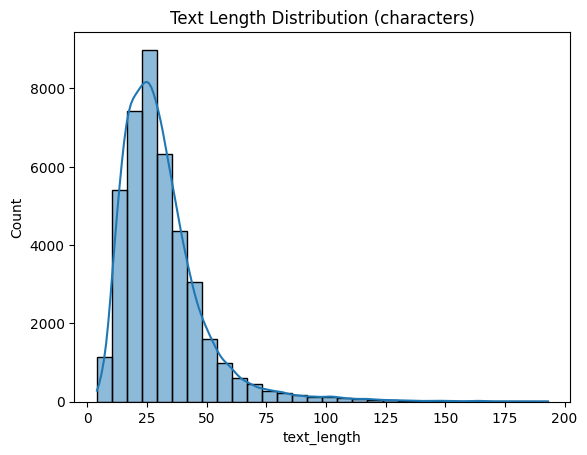

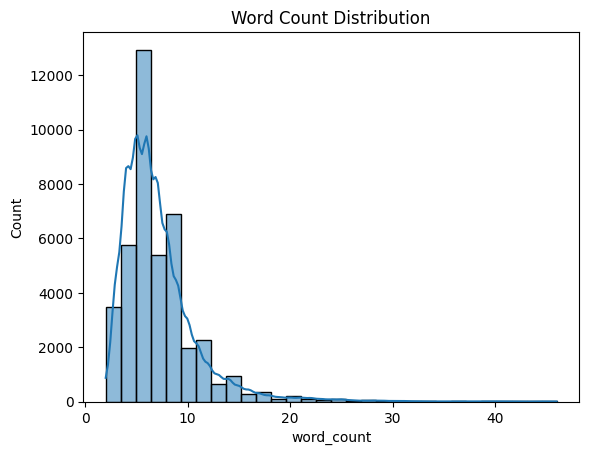

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

train_df['text_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

print(train_df[['text_length', 'word_count']].describe())

sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution (characters)")
plt.show()

sns.histplot(train_df['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.show()


In [ ]:
# Arabic = \u0600-\u06FF, Latin = a-zA-Z
train_df['has_english'] = train_df['text'].apply(lambda x: bool(re.search(r'[a-zA-Z]', x)))
train_df['has_arabic'] = train_df['text'].apply(lambda x: bool(re.search(r'[\u0600-\u06FF]', x)))

code_switch_count = train_df['has_english'].sum()
print(f"Code-switched rows (Arabic+English): {code_switch_count} / {len(train_df)}")
train_df[train_df['has_english'] == True]

Code-switched rows (Arabic+English): 1 / 41600


,text,dialect,text_length,word_count,has_english,has_arabic
202,أريد لفتان من ISO مائة ، فيلم ملون ، ستة وثلاث...,MSA,65,16,True,True


## 🔍 Initial insepction shows:
- Text is almost entirely in Arabic
- Almost all diacritics have been purged
- Classes are very balanced.


In [ ]:
import pandas as pd
import re
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data once
nltk.download('punkt_tab')

# Optional: Define basic Arabic cleanup
def clean_text(text):
    # Remove punctuation, digits, non-Arabic letters
    text = re.sub(r'[^\u0600-\u06FF\s]', '', str(text))  # Keep Arabic characters only
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text.strip()

# Step 1: Clean and tokenize
train_df['clean_text'] = train_df['text'].apply(clean_text)
train_df['tokens'] = train_df['clean_text'].apply(word_tokenize)

# Step 2: Flatten all tokens and count
all_tokens = [token for tokens in train_df['tokens'] for token in tokens]
top_20 = Counter(all_tokens).most_common(20)

# Show the results
print("Top 20 most common Arabic words:")
for word, freq in top_20:
    print(f"{word}: {freq}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Top 20 most common Arabic words:
؟: 17744
،: 10185
من: 4378
في: 3628
لو: 2557
سمحت: 2512
على: 2349
ممكن: 2255
ما: 1817
و: 1689
وين: 1211
هل: 1204
هذا: 1174
أنا: 1147
عندك: 1112
واحد: 1100
انا: 1049
هو: 1031
فضلك: 1022
بس: 904


<ipython-input-41-22060ac21d1e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='count', y='word', palette='viridis')


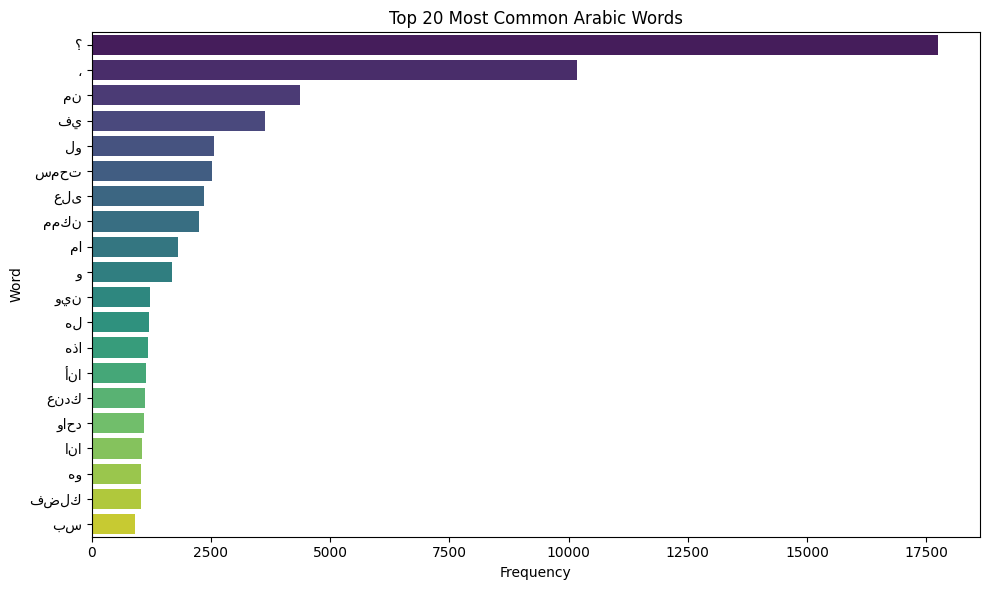

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(top_20, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_df, x='count', y='word', palette='viridis')
plt.title("Top 20 Most Common Arabic Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [ ]:
# first we define a list of arabic and english punctiations that we want to get rid of in our text
import string

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Arabic stop words with nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):

    '''
    text is an arabic string input

    the preprocessed text is returned
    '''

    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)

    #remove longation
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    text = ' '.join(word for word in text.split() if word not in arabic_stopwords)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##If we remove stop words and remove arabic punctuation, here is what is looks like



In [ ]:
import pandas as pd
import re
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data once
nltk.download('punkt_tab')

# Step 1: Clean and tokenize
train_df['clean_text'] = train_df['text'].apply(preprocess)
train_df['tokens'] = train_df['clean_text'].apply(word_tokenize)

# Step 2: Flatten all tokens and count
all_tokens = [token for tokens in train_df['tokens'] for token in tokens]
top_20 = Counter(all_tokens).most_common(20)

# Show the results
print("Top 20 most common Arabic words:")
for word, freq in top_20:
    print(f"{word}: {freq}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Top 20 most common Arabic words:
سمحت: 2512
علي: 2489
ممكن: 2255
انا: 2203
اي: 1224
وين: 1211
عندك: 1112
فضلك: 1022
اذا: 929
بدي: 900
الي: 819
عندي: 750
هاد: 713
لازم: 696
شويه: 642
ده: 627
ان: 609
تقدر: 608
شي: 608
ايه: 595


<ipython-input-44-22060ac21d1e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='count', y='word', palette='viridis')


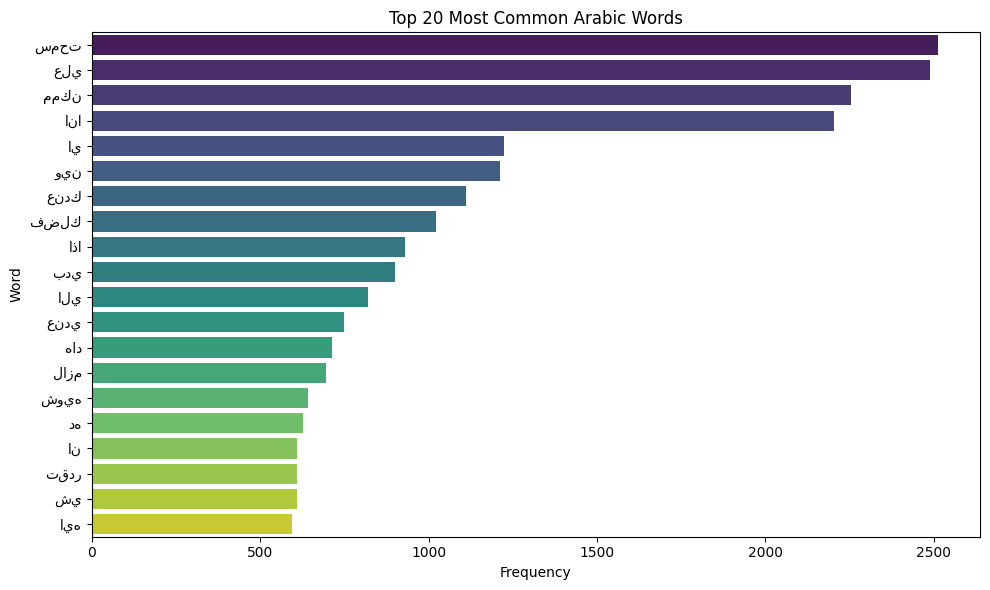

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(top_20, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_df, x='count', y='word', palette='viridis')
plt.title("Top 20 Most Common Arabic Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

#FINAL NOTES ON DATA EXPLORATION AND ANALYSIS

✅ VECTORIZATION:
- Each word or letter could be turned into a vector either one hot encoded or turned into an integer representing an entry in our vocabulary.

✅ WORD EMBEDDINGS
- We could also turn these words into our own embeddings either custom, word2vec or glove embeddings. The former two listed are well established embeddings trained over large amounts of data and are widely used. However for arabic text this might not be very effective.
- Popular transformer and other ML models for NLP have their own word embedding layer built into the model. This makes it disadvantageous to do your own preprocessing as the model relies on doing proprietary preprocessing needed for that specific model.

---

That is enough data analysis and exploration for now. In the next notebook we will start discussing and exploring what types of models and strategies to use for dialect detection.

#Footnote

This notebook explores the MADAR dataset as if we don't have accompanying metadata or a paper outlining all the specifications and details of the dataset. However there is a paper writting about this [dataset](https://aclanthology.org/W19-4622.pdf) and I'll highlight some key details about the MADAR dataset here:

## Keypoints from the paper:
- The whole MADAR dataset was presented as a challenge to teams as two tasks:
    - Subtask 1: Travel Domain Dialect Indentificaiton dataset:
        - 26 labels representing cities and MSA.
        - Parallel sentences (sentences with the same meaning and structure but written in 26 different dialects)
        - There was a second corpus with 10,000 more sentences but there are only 6 labels for those.
    - Subtask-2: MADAR Twitter User Dialect
Identification:
        - Given a python script to scrape tweets from certain users
        - Given list of users and their dialect labels
- Best results for subtask 1 achieved 67.32% F1-score.
- "The top five systems all used non-neural ML models and word and character features. Two of the top three systems used ensemble methods
(See Table 8). Generally, the neural methods did not do well. This is consistent with what Salameh et al. (2018) reported, and is likely the result of
limited training data. It is noteworthy that none of the competing systems overcame the previously published Salameh et al. (2018) result."

❗ For this series of notebooks, I decided to only use the first corpus from subtask 1 called MADAR-26

## Final-Final Note:

1. I will try to use a pretrained model with word embeddings. Given the word embeddings training on a large amount of data, I hope to be able to fine tune it to this small amount of data in MADAR-26. Since word-embeddings typically do better than word and character features for general NLP uses, I hope to leverage other large scale model abstract learnings with word-ebeddings on dialect detection.
2. While in theory ensemble models should have the best perforance (because they are just a majority vote of multiple models), the free edition of google colab might not have the resources to run multiple large scale models. So if I do have an ensemble model they will have to be multiple light-weight models.